In [2]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import precision_score, recall_score


In [3]:
cancelation_df = pd.read_csv('../../raw_data/miercoles_316airports.csv', nrows=1000000)

In [4]:
cancelation_df = cancelation_df.sample(50000)

In [5]:
cancelation_df.shape

(50000, 10)

In [6]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False) 

# Fit encod
ohe.fit(cancelation_df[['AIRLINE']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The categories detected by the OneHotEncoder are [array(['AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA',
       'US', 'VX', 'WN'], dtype=object)]


/home/msoledadp/.pyenv/versions/3.10.6/envs/flight-predictor/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [1]:
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "Street" column
cancelation_df[ohe.get_feature_names_out()] = ohe.transform(cancelation_df[['AIRLINE']])

# Drop the column "Street" which has been encoded
cancelation_df.drop(columns = ["AIRLINE"], inplace = True)

# Show the dataset
cancelation_df.head(3)

NameError: name 'ohe' is not defined

In [8]:
# Instantiate the OneHotEncoder ORIGIN AIRPORT
# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse = False) 

# Fit encoder
ohe.fit(cancelation_df[['ORIGIN_AIRPORT']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The categories detected by the OneHotEncoder are [array(['ABE', 'ABI', 'ABQ', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY', 'ADQ',
       'AEX', 'ALB', 'ALO', 'AMA', 'ANC', 'APN', 'ASE', 'ATL', 'ATW',
       'AUS', 'AVL', 'AVP', 'AZO', 'BDL', 'BET', 'BFL', 'BGR', 'BHM',
       'BIL', 'BIS', 'BJI', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQN',
       'BRD', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI',
       'BZN', 'CAE', 'CAK', 'CDV', 'CHA', 'CHO', 'CHS', 'CID', 'CIU',
       'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 'COD', 'COS', 'COU',
       'CPR', 'CRP', 'CRW', 'CVG', 'CWA', 'DAL', 'DAY', 'DBQ', 'DCA',
       'DEN', 'DFW', 'DHN', 'DIK', 'DLH', 'DRO', 'DSM', 'DTW', 'DVL',
       'EAU', 'ECP', 'EGE', 'ELM', 'ELP', 'ESC', 'EUG', 'EVV', 'EWR',
       'EYW', 'FAR', 'FAT', 'FCA', 'FLG', 'FLL', 'FNT', 'FSD', 'FSM',
       'FWA', 'GCC', 'GCK', 'GEG', 'GGG', 'GJT', 'GNV', 'GPT', 'GRB',
       'GRI', 'GRK', 'GRR', 'GSO', 'GSP', 'GTR', 'GUC', 'HLN', 'HNL',
       'HOB', 'HOU', 'HPN', 'HSV', 'HYS'

/home/msoledadp/.pyenv/versions/3.10.6/envs/flight-predictor/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "Street" column
cancelation_df[ohe.get_feature_names_out()] = ohe.transform(cancelation_df[['ORIGIN_AIRPORT']])

# Drop the column "Street" which has been encoded
cancelation_df.drop(columns = ["ORIGIN_AIRPORT"], inplace = True)

# Show the dataset
cancelation_df.head(3)

The column names for the encoded values are ['ORIGIN_AIRPORT_ABE' 'ORIGIN_AIRPORT_ABI' 'ORIGIN_AIRPORT_ABQ'
 'ORIGIN_AIRPORT_ABY' 'ORIGIN_AIRPORT_ACK' 'ORIGIN_AIRPORT_ACT'
 'ORIGIN_AIRPORT_ACV' 'ORIGIN_AIRPORT_ACY' 'ORIGIN_AIRPORT_ADQ'
 'ORIGIN_AIRPORT_AEX' 'ORIGIN_AIRPORT_ALB' 'ORIGIN_AIRPORT_ALO'
 'ORIGIN_AIRPORT_AMA' 'ORIGIN_AIRPORT_ANC' 'ORIGIN_AIRPORT_APN'
 'ORIGIN_AIRPORT_ASE' 'ORIGIN_AIRPORT_ATL' 'ORIGIN_AIRPORT_ATW'
 'ORIGIN_AIRPORT_AUS' 'ORIGIN_AIRPORT_AVL' 'ORIGIN_AIRPORT_AVP'
 'ORIGIN_AIRPORT_AZO' 'ORIGIN_AIRPORT_BDL' 'ORIGIN_AIRPORT_BET'
 'ORIGIN_AIRPORT_BFL' 'ORIGIN_AIRPORT_BGR' 'ORIGIN_AIRPORT_BHM'
 'ORIGIN_AIRPORT_BIL' 'ORIGIN_AIRPORT_BIS' 'ORIGIN_AIRPORT_BJI'
 'ORIGIN_AIRPORT_BMI' 'ORIGIN_AIRPORT_BNA' 'ORIGIN_AIRPORT_BOI'
 'ORIGIN_AIRPORT_BOS' 'ORIGIN_AIRPORT_BPT' 'ORIGIN_AIRPORT_BQN'
 'ORIGIN_AIRPORT_BRD' 'ORIGIN_AIRPORT_BRO' 'ORIGIN_AIRPORT_BRW'
 'ORIGIN_AIRPORT_BTM' 'ORIGIN_AIRPORT_BTR' 'ORIGIN_AIRPORT_BTV'
 'ORIGIN_AIRPORT_BUF' 'ORIGIN_AIRPORT_BUR' 'ORIGIN_AIRPORT_B

/tmp/ipykernel_16299/1709622753.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cancelation_df[ohe.get_feature_names_out()] = ohe.transform(cancelation_df[['ORIGIN_AIRPORT']])
/tmp/ipykernel_16299/1709622753.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cancelation_df[ohe.get_feature_names_out()] = ohe.transform(cancelation_df[['ORIGIN_AIRPORT']])
/tmp/ipykernel_16299/1709622753.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor per

,MONTH,DAY,DAY_OF_WEEK,DESTINATION_AIRPORT,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,AIRLINE_AA,AIRLINE_AS,...,ORIGIN_AIRPORT_TVC,ORIGIN_AIRPORT_TWF,ORIGIN_AIRPORT_TXK,ORIGIN_AIRPORT_TYR,ORIGIN_AIRPORT_TYS,ORIGIN_AIRPORT_UST,ORIGIN_AIRPORT_VLD,ORIGIN_AIRPORT_VPS,ORIGIN_AIRPORT_XNA,ORIGIN_AIRPORT_YUM
524019,2,7,6,JFK,236.0,1598,1057,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188514,1,26,1,DFW,62.0,190,650,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120435,4,23,4,STL,108.0,550,1658,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Instantiate the OneHotEncoder DESTINATION_AIRPORT
ohe = OneHotEncoder(sparse = False) 

# Fit encoder
ohe.fit(cancelation_df[['DESTINATION_AIRPORT']]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")
# Display the generated names
print(f"The column names for the encoded values are {ohe.get_feature_names_out()}")

# Transform the current "Street" column
cancelation_df[ohe.get_feature_names_out()] = ohe.transform(cancelation_df[['DESTINATION_AIRPORT']])

# Drop the column "Street" which has been encoded
cancelation_df.drop(columns = ["DESTINATION_AIRPORT"], inplace = True)

# Show the dataset
cancelation_df.head(3)

/home/msoledadp/.pyenv/versions/3.10.6/envs/flight-predictor/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/tmp/ipykernel_16299/1202173958.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cancelation_df[ohe.get_feature_names_out()] = ohe.transform(cancelation_df[['DESTINATION_AIRPORT']])
/tmp/ipykernel_16299/1202173958.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To ge

The categories detected by the OneHotEncoder are [array(['ABE', 'ABI', 'ABQ', 'ABY', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ',
       'AEX', 'AGS', 'ALB', 'ALO', 'AMA', 'ANC', 'APN', 'ASE', 'ATL',
       'ATW', 'AUS', 'AVL', 'AVP', 'AZO', 'BDL', 'BET', 'BFL', 'BGM',
       'BHM', 'BIL', 'BIS', 'BJI', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT',
       'BQK', 'BQN', 'BRO', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN',
       'CAE', 'CAK', 'CEC', 'CHA', 'CHO', 'CHS', 'CID', 'CLE', 'CLL',
       'CLT', 'CMH', 'CMI', 'CMX', 'COD', 'COS', 'COU', 'CPR', 'CRP',
       'CRW', 'CVG', 'CWA', 'DAL', 'DAY', 'DBQ', 'DCA', 'DEN', 'DFW',
       'DHN', 'DIK', 'DLH', 'DRO', 'DSM', 'DTW', 'DVL', 'EAU', 'ECP',
       'EGE', 'ELM', 'ELP', 'ERI', 'ESC', 'EUG', 'EVV', 'EWR', 'EYW',
       'FAR', 'FAT', 'FAY', 'FCA', 'FLG', 'FLL', 'FNT', 'FSD', 'FSM',
       'FWA', 'GCC', 'GEG', 'GGG', 'GJT', 'GNV', 'GPT', 'GRB', 'GRI',
       'GRK', 'GRR', 'GSO', 'GSP', 'GTF', 'GTR', 'HNL', 'HOB', 'HOU',
       'HPN', 'HRL', 'HSV', 'HYS', 'IAD'

/tmp/ipykernel_16299/1202173958.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cancelation_df[ohe.get_feature_names_out()] = ohe.transform(cancelation_df[['DESTINATION_AIRPORT']])
/tmp/ipykernel_16299/1202173958.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  cancelation_df[ohe.get_feature_names_out()] = ohe.transform(cancelation_df[['DESTINATION_AIRPORT']])
/tmp/ipykernel_16299/1202173958.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,CANCELLED,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,...,DESTINATION_AIRPORT_TUS,DESTINATION_AIRPORT_TVC,DESTINATION_AIRPORT_TWF,DESTINATION_AIRPORT_TXK,DESTINATION_AIRPORT_TYR,DESTINATION_AIRPORT_TYS,DESTINATION_AIRPORT_VEL,DESTINATION_AIRPORT_VPS,DESTINATION_AIRPORT_XNA,DESTINATION_AIRPORT_YAK
524019,2,7,6,236.0,1598,1057,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
188514,1,26,1,62.0,190,650,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120435,4,23,4,108.0,550,1658,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='DAY_OF_WEEK', ylabel='Count'>

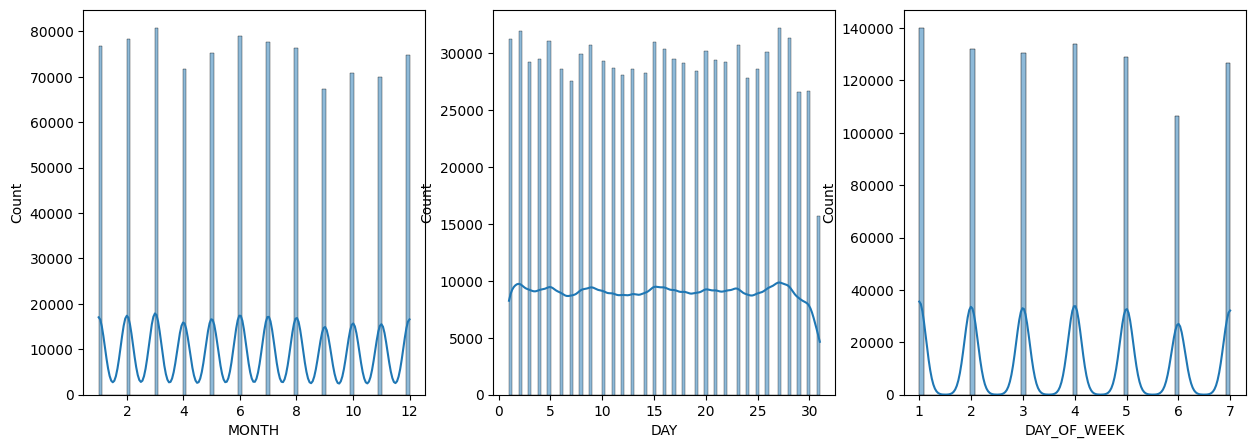

In [101]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.histplot(data = cancelation_df, x = f"{'MONTH'}", kde=True, ax=ax[0])
sns.histplot(data = cancelation_df, x = f"{'DAY'}", kde=True, ax=ax[1])
sns.histplot(data = cancelation_df, x = f"{'DAY_OF_WEEK'}", kde=True, ax=ax[2])

<Axes: xlabel='SCHEDULED_ARRIVAL', ylabel='Count'>

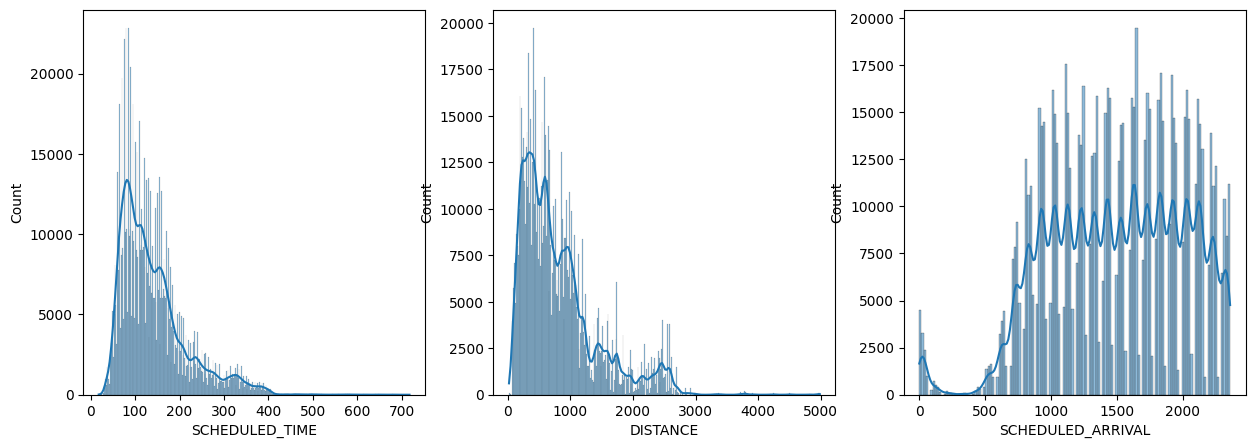

In [102]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

sns.histplot(data = cancelation_df, x = f"{'SCHEDULED_TIME'}", kde=True, ax=ax[0])
sns.histplot(data = cancelation_df, x = f"{'DISTANCE'}", kde=True, ax=ax[1])
sns.histplot(data = cancelation_df, x = f"{'SCHEDULED_ARRIVAL'}", kde=True, ax=ax[2])

In [11]:
cancelation_df.shape

(50000, 552)

In [12]:
cancelation_df = cancelation_df.dropna()

In [13]:
#X = cancelation_df.drop(columns = ['CANCELLED', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'])
X = cancelation_df.drop(columns = ['CANCELLED'])
y = cancelation_df['CANCELLED']

In [14]:
y.value_counts()

CANCELLED
0    43804
1     6195
Name: count, dtype: int64

In [15]:
X.shape, y.shape

((49999, 551), (49999,))

In [16]:
# STEP 0 - Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

#Standard Scaler
std_scaler = StandardScaler()
X_train_sc = std_scaler.fit_transform(X_train)
X_test_sc=std_scaler.transform(X_test)


In [17]:
# Instanciate the model
knn_model = KNeighborsClassifier(n_neighbors=8)

knn_model.fit(X_train_sc, y_train)

# Train the model on the scaled Training data
cv_results = cross_validate(knn_model, X_train_sc, y_train, cv=10, scoring=['precision'])


In [18]:
knn_score = cv_results['test_precision'].mean()
knn_score

0.7705405036734146

In [19]:
y_pred= knn_model.predict(X_test_sc)

In [20]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
y_train.shape

(34999,)

In [22]:
#Predecir para vuelos cancelados 1
y_predict_baseline = np.ones(len(y_train))

precision_baseline = precision_score(y_train, y_predict_baseline)

In [23]:
precision_baseline

0.12431783765250436

In [24]:
y_train.value_counts()

CANCELLED
0    30648
1     4351
Name: count, dtype: int64

In [164]:
#recall_baseline = recall_score(y_train, y_predict_baseline)
#recall_baseline

1.0

In [25]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

# n_neighbors
k_range = list(range(1,30))

# weights
weigh_options = ["uniform", "distance"]

# P
p = [1,2] 

param_grid = dict(n_neighbors = k_range, weights = weigh_options , p = p) 

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='precision', verbose=1, n_jobs=-1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_sc, y_train)


Fitting 5 folds for each of 116 candidates, totalling 580 fits


/home/msoledadp/.pyenv/versions/3.10.6/envs/flight-predictor/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/msoledadp/.pyenv/versions/3.10.6/envs/flight-predictor/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print(grid_search.best_params_)

{'n_neighbors': 29, 'p': 2, 'weights': 'distance'}


In [27]:
print(grid.best_score_)

0.9224422107528708


In [28]:
# Instanciate the model
knn_model = KNeighborsClassifier(n_neighbors=29, p=2, weights='distance')

knn_model.fit(X_train_sc, y_train)

# Train the model on the scaled Training data
cv_results = cross_validate(knn_model, X_train_sc, y_train, cv=10, scoring=['precision'])

In [29]:
knn_score = cv_results['test_precision'].mean()
knn_score

0.9212142419886439